In [13]:
import numpy as np
import matlab.engine
import os
import signal
import time
import scipy.io as sio
import time
import subprocess
import matplotlib.pyplot as plt

In [14]:
forward_tx_gain = 5
forward_rx_gain = 12
backward_tx_gain = 10
backward_rx_gain = 15

In [15]:

string1 = 'python3 TX_Feedback.py -tx_gain ' + str(forward_tx_gain)
string2 = 'python3 RX_Feedback.py -rx_gain ' + str(forward_rx_gain)

In [16]:
# Message generation
subprocess.call(string1 + ' -dev_type encoder_noise', shell= True)

TX Noise generated
TX Transmission starts


0

In [17]:
# Receiver receives first message
subprocess.call(string2 + ' -dev_type decoder_noise -n_captures 3', shell= True)

# Transmitter process kill
subprocess.call('python3 /home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/flowgraph_process_kill.py', shell= True)

RX Reception 31 starts
Capture : 1 ...
Capture done
Frame: 3  SNR:  29.07
Frame: 4  SNR:  29.60
Frame: 5  SNR:  29.68
Frame: 6  SNR:  29.34
Frame: 7  SNR:  29.27
Frame: 8  SNR:  29.22
Frame: 9  SNR:  29.14
Frame: 10  SNR:  28.96
Frame: 11  SNR:  29.08
Frame: 12  SNR:  28.51
Frame: 13  SNR:  28.83
Frame: 14  SNR:  28.96
Frame: 15  SNR:  28.95
Frame: 16  SNR:  29.41
Frame: 17  SNR:  28.34
Frame: 18  SNR:  21.04
Frame: 19  SNR:  28.09
Frame: 20  SNR:  28.73
Frame: 22  SNR:  21.51
Frame: 23  SNR:  21.33
Frame: 24  SNR:  21.94
Frame: 0  SNR:  21.97
Frame: 1  SNR:  21.61
Frame: 2  SNR:  21.73
Frame: 3  SNR:  22.69
Frame: 6  SNR:  22.68
Frame: 7  SNR:  23.45
Frame: 8  SNR:  22.90
Frame: 9  SNR:  23.54
Frame: 10  SNR:  24.14
Frame: 11  SNR:  24.18
Frame: 12  SNR:  24.23
Frame: 13  SNR:  23.98
Frame: 14  SNR:  23.46
Capture : 2 ...
Capture done
Frame: 24  SNR:  25.41
Frame: 0  SNR:  25.50
Frame: 1  SNR:  25.88
Frame: 2  SNR:  25.74
Frame: 3  SNR:  25.43
Frame: 4  SNR:  26.47
Frame: 5  SNR:  25.

0

In [18]:
subprocess.call('python3 flowgraph_process_kill.py', shell= True)


Process Successfully terminated


0

5.656197945139034e-07
1.1518167944903402e-06


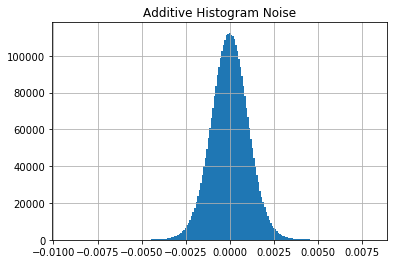

In [19]:


Noise_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/Noise_Output.mat')
Noise_Output = np.real(Noise_Output['Noise'])

print(np.mean(Noise_Output))
print(np.var(Noise_Output))

plt.figure()
plt.hist(Noise_Output, 200)
plt.title('Additive Histogram Noise')
plt.grid(True)
plt.savefig('Figures/additive_noise.png')
plt.show()

